<a href="https://colab.research.google.com/github/akitim/SkillFactory_projects/blob/main/Project_4_Computer_says_no_Akimkin_Timofey.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# import warnings
# warnings.filterwarnings('ignore')

# import sys
# from google.colab import drive
# drive.mount('/content/gdrive', force_remount=True)
# sys.path.clear
# sys.path.append('/content/gdrive/MyDrive/SkillFactory')

In [30]:
path = 'https://raw.githubusercontent.com/akitim/datasets/main/computer_says_no.csv'
data = pd.read_csv(path, encoding = 'ISO-8859-1', low_memory = False)
data.sample(1)

,client_id,education,sex,age,car,car_type,decline_app_cnt,good_work,bki_request_cnt,home_address,work_address,income,foreign_passport,default
22200,99481,SCH,F,60,Y,N,0,0,2,2,3,9200,N,0


In [31]:
data.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73799 entries, 0 to 73798
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   client_id         73799 non-null  int64 
 1   education         73492 non-null  object
 2   sex               73799 non-null  object
 3   age               73799 non-null  int64 
 4   car               73799 non-null  object
 5   car_type          73799 non-null  object
 6   decline_app_cnt   73799 non-null  int64 
 7   good_work         73799 non-null  int64 
 8   bki_request_cnt   73799 non-null  int64 
 9   home_address      73799 non-null  int64 
 10  work_address      73799 non-null  int64 
 11  income            73799 non-null  int64 
 12  foreign_passport  73799 non-null  object
 13  default           73799 non-null  int64 
dtypes: int64(9), object(5)
memory usage: 7.9+ MB


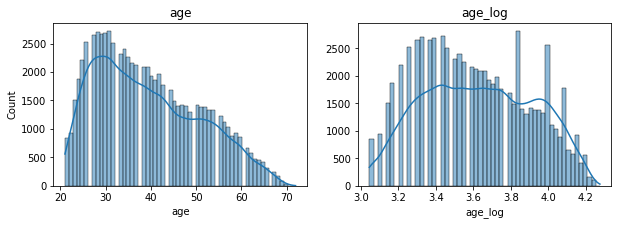

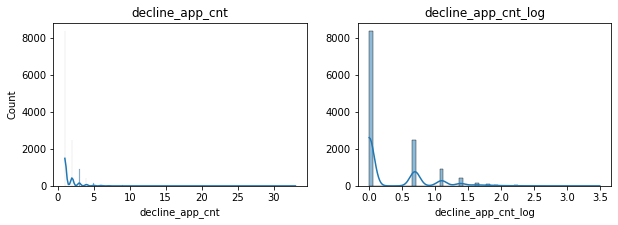

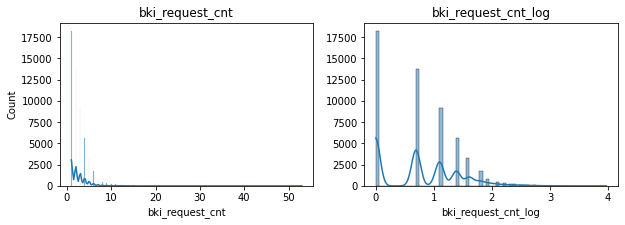

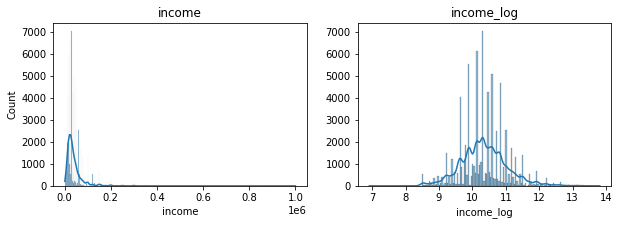

In [44]:
#бинарные переменные 
bin_cols = ['sex', 'car', 'car_type', 'good_work', 'foreign_passport']

#категориальные переменные
cat_cols = ['education', 'work_address', 'home_address']

#числовые переменные
num_cols = ['age', 'decline_app_cnt', 'bki_request_cnt', 'income']

for category in num_cols:
    # plt.figure()
    fig, (ax1, ax2) = plt.subplots(1, 2, sharey=False, figsize=(10,3))
    # fig.set_figwidth = 18

    sns.histplot(data[category][data[category] > 0].dropna(), kde=True, ax=ax1)
    ax1.set_title(category)

    sns.histplot(data[category][data[category] > 0].apply(np.log).dropna(), kde=True, ax=ax2)
    ax2.set_title(category + '_log')
    ax2.set_ylabel('')
    ax2.set_xlabel(category + '_log')
    plt.show()

SCH    38860
GRD    23365
UGR     9816
PGR     1257
ACD      194
Name: education, dtype: int64

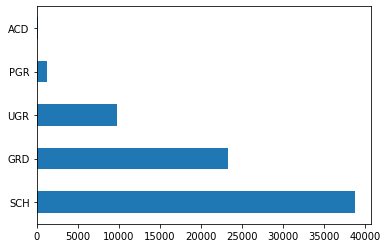

In [33]:
data.education.value_counts().plot.barh();
data.education.value_counts()

In [36]:
# np.random.RandomState = 49

edu_species = data.education.dropna().unique()
edu_species_num = edu_species.shape[0]
weights = data.education.value_counts() / data.education.count()

data.education = data.education.apply(
    lambda x: np.random.choice(edu_species, 1, p = weights)[0] if pd.isna(x) else x
)